# SOFTMAX REGRESSION FROM SCRATCH

In [108]:
import numpy as np
from my_extensions import MyModelExtensions
from sklearn.datasets import fetch_openml

# IMPORT MNIST DATA
mnist = fetch_openml("mnist_784", version=1)
X, y = np.array(mnist["data"]), np.array(mnist["target"])
np.random.seed(42)

In [109]:
# SPLIT DATA INTO TRAINING AND TESTING SETS

# Add 1s column to the X matrix to account for the bias term
X = np.c_[np.ones((len(X), 1)), X]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]



In [110]:
# NORMALIZE DATA
X_train = X_train / 255
X_test = X_test / 255



In [111]:

# SOFTMAX FUNCTION
def softmax(logits):
    """
    Returns the values of the logits vector after applying the softmax function.
    
    :param logits: Feature vector, computed as linear model. 
    :return: np.array
    """
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums


# CROSS-ENTROPY LOSS FUNCTION
def cross_entropy_loss(Y, y_proba):
    """
    Returns the cross-entropy loss of the model.
    
    :param Y: One-hot encoded ture labels
    :param y_proba: Predicted probabilities. There are the same number of probabilities as the number of classes for each sample/observation.
    :return: float
    """
    loss = -np.mean(np.sum(Y * np.log(y_proba + 1e-7), axis=1))
    return loss


# CREATE SOFTMAX REGRESSION MODEL FROM SCRATCH
# Inherit from the Extension class to use its methods for visualization and evaluation
class MySoftmaxRegression(MyModelExtensions):
    def __init__(self, nr_of_features, nr_of_classes, learning_rate=0.1, n_iterations=1000):
        """
        Softmax regression model.
        
        It relies on linear regression model. All the computations are the same as in the Linear Regression model. But in order to make multiclass predictions we cannot rely as usual on the number same number of thetas/parameters as the number of features. In this case it is true, that there is still the number of thetas for each feature, but rather having only one theta per each feature, we have matrix of thetas where for each feature there are the number of thetas equal to the number of classes. This in practise means that if you have in one data point 3 features and 5 classes then you will have 5 thetas for each feature.
        
        :param nr_of_features: Number of features per sample/observation 
        :param nr_of_classes: Number of possible classes per sample/observation
        :param learning_rate: How fast the model should learn
        :param n_iterations: How many times the model should learn
        """
        super().__init__()
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.n_inputs = nr_of_features
        self.n_outputs = nr_of_classes
        self.thetas = []
        self.losses = []

    def fit(self, X, y):
        """
        Fit the model to the data X and y. Meaning let the model learn the parameters.
        :param X: Features
        :param y: Labels
        :return: None
        """

        n_samples = len(X)
        
        # one-hot encode the labels (example in a cell below)
        Y = np.eye(self.n_outputs)[y.astype(int)]

        # initialize the parameters with random values
        self.thetas = np.random.randn(self.n_inputs, self.n_outputs)

        # gradient descent
        for iteration in range(self.n_iterations):
            # compute linear model (linear predictions)
            linear_model = np.dot(X, self.thetas)

            # apply softmax function to get probabilities
            y_prediction = softmax(linear_model)
 
            # compute the cost (only for visualization, not used in the optimization process)
            loss = cross_entropy_loss(Y, y_prediction)
            self.losses.append(loss)
            
            # compute the gradients
            gradients = 2 / n_samples * np.dot(X.T, (y_prediction - Y))

            # update the parameters
            self.thetas = self.thetas - self.learning_rate * gradients

    def predict(self, X):
        """
        Predict the class labels for the provided data
        :param X: Features
        :return: Predicted class labels
        """
        linear_model = np.dot(X, self.thetas)
        return softmax(linear_model)


In [112]:
# 4 - we specify that we are working with 4 classes
# [0, 1, 2, 3, 3, 2, 1, 0] - Array we want to one-hot encode
Y = np.eye(4)[[0, 1, 2, 3, 3, 2, 1, 0]]
Y

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [113]:
# TRAIN THE MODEL (Takes 10 minutes to run. If you want to make it faster, then implement mini-batch gradient descent or SGD, instead of batch gradient descent)

model = MySoftmaxRegression(nr_of_features=X_train.shape[1], # 784, because 28x28 pixels + 1 for bias
                            nr_of_classes=len(np.unique(y_train)), # 10, because 10 digits
                            learning_rate=0.1,
                            n_iterations=10_000)
model.fit(X_train, y_train)

In [114]:
# show the parameters
print("Best parameters:")
model.show_parameters()

Best parameters:


array([[ 0.48850952, -0.13575268,  0.65166786, ...,  0.77815441,
        -0.4947229 ,  0.53784634],
       [-0.46341769, -0.46572975,  0.24196227, ...,  0.31424733,
        -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , ...,  0.37569802,
        -0.60063869, -0.29169375],
       ...,
       [ 0.59899634,  0.85334898, -0.49419002, ..., -0.22093172,
         0.19112423, -1.14970747],
       [-0.19360951,  0.7445864 ,  0.64194713, ..., -0.07782144,
        -0.27595145, -0.36172384],
       [-0.06289387, -0.44787764,  0.65814304, ...,  0.06970427,
        -0.65065662, -0.32664756]])

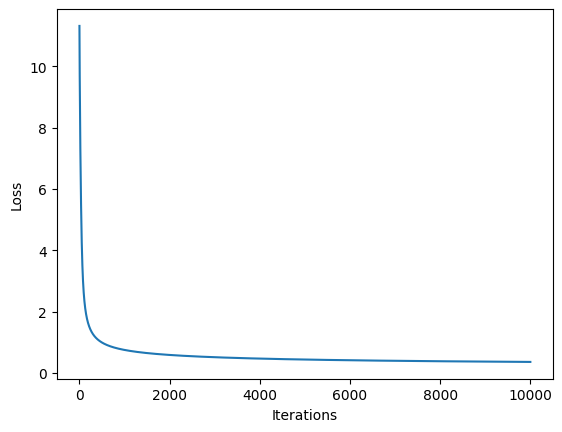

In [115]:
# VISUALIZE THE MODELS LOSS CURVE

model.show_loss_curve()

In [116]:
# EVALUATE THE MODEL

y_pred = model.predict(X_test)

accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test.astype(int))
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In those few cells below I demonstrate how you can take only one vector containing thetas/parameters of a given class and use only binary classificator

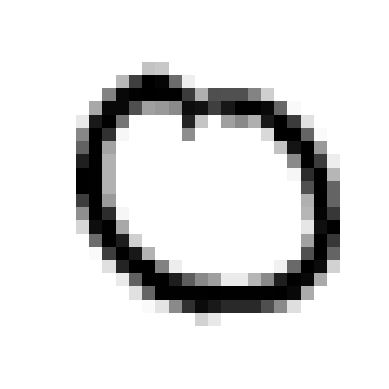

In [117]:
# take a sample from the training set, which is number 0
X_sample_0 = X_train[108]

# visualise the sample with matplotlib
import matplotlib.pyplot as plt


def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# [1:] to remove the bias term
plot_digit(X_sample_0[1:])

In [118]:

def sigmoid(t):
    """
    Returns the values of the t vector after applying the sigmoid function.
    
    :param t: Feature vector. 
    :return: np.array
    """
    return 1 / (1 + np.exp(-t))

def predict(X, thetas):
    """
    Just a helper function to predict sigmoid class probabilities
    """
    linear_model = np.dot(X, thetas)
    y_predicted = sigmoid(linear_model)
    return y_predicted

for i, softmax_probability in enumerate(model.predict([X_sample_0])[0]):
    sigmoid_probability = predict(X_sample_0, model.thetas[:, i])
    print(f"Class:{i}",
          f"Sigmoid:{sigmoid_probability:.5f}",
          f"Softmax:{softmax_probability:.5f}",
          sep=", ")


Class:0, Sigmoid:1.00000, Softmax:0.99834
Class:1, Sigmoid:0.00004, Softmax:0.00000
Class:2, Sigmoid:0.99681, Softmax:0.00123
Class:3, Sigmoid:0.01005, Softmax:0.00000
Class:4, Sigmoid:0.00000, Softmax:0.00000
Class:5, Sigmoid:0.81352, Softmax:0.00002
Class:6, Sigmoid:0.56879, Softmax:0.00001
Class:7, Sigmoid:0.00017, Softmax:0.00000
Class:8, Sigmoid:0.99064, Softmax:0.00041
Class:9, Sigmoid:0.00001, Softmax:0.00000
